In [1]:
%matplotlib inline

In [3]:
#!/usr/bin/python

import numpy as np
import pandas as pd
import sys
import subprocess
import logbook
import pytz
import datetime
import matplotlib.pyplot as plt
from test_johansen import test_stocks
import quandl

zipline_logging= logbook.NestedSetup([logbook.NullHandler(level=logbook.DEBUG),logbook.StreamHandler(sys.stdout,level=logbook.INFO),logbook.StreamHandler(sys.stderr,level=logbook.ERROR),])
zipline_logging.push_application()

#from zipline.data.bundles import register,ingest,yahoo_equities
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol, schedule_function, date_rules, time_rules, get_environment

evec = test_stocks()

def initialize(context):
    context.s1= symbol('AYI')
    context.s2= symbol('APA')
    context.s3= symbol('AMZN')
    context.s4= symbol('LNT')
    context.s5= symbol('CTL')
    context.s6= symbol('ALB')
    context.s7= symbol('ABBV')
    context.s8= symbol('AMT')
    context.s9= symbol('ADM')
    context.s10= symbol('AON')
    context.s11= symbol('ORCL')
    
    
    context.amlong= False
    context.amshort= False

    schedule_function(place_orders, date_rules.every_day())
    #schedule_function(stop_loss,date_rules.every_day(), time_rules.market_open())
    # time_rules.market_open()
def before_trading_start(context,data):

    s1close= data.history(context.s1,'close',50,'1d')
    s2close= data.history(context.s2,'close',50,'1d')
    s3close= data.history(context.s3,'close',50,'1d')
    s4close= data.history(context.s4,'close',50,'1d')
    s5close= data.history(context.s5,'close',50,'1d')
    s6close= data.history(context.s6,'close',50,'1d')
    s7close= data.history(context.s7,'close',50,'1d')
    s8close= data.history(context.s8,'close',50,'1d')
    s9close= data.history(context.s9,'close',50,'1d')
    s10close= data.history(context.s10,'close',50,'1d')
    s11close= data.history(context.s11,'close',50,'1d')
    
    s = np.array([s1close,s2close,s3close,s4close,s5close,s6close,s7close,s8close,s9close,s10close,s11close])
    
    res= np.dot(evec,s)

    context.avg= res.mean()
    context.std= res.std(ddof=0)
'''
def stop_loss(context,data):
    shortc= data.current(context.short,'price')
    longc= data.current(context.long,'price')
    resc= longc- beta_hr*shortc
    if context.amlong== True or context.amshort == True:
        returns= (resc - context.rescur)/context.rescur
        if returns < -0.2:
            order_target_percent(context.long,0)
            order_target_percent(context.short,0)
            context.amlong = False
            context.amshort = False
  '''  
def place_orders(context,data): 
    
    s1_percent= evec[0]
    s2_percent= evec[1]
    s3_percent= evec[2]
    s4_percent= evec[3]
    s5_percent= evec[4]
    s6_percent= evec[5]
    s7_percent= evec[6]
    s8_percent= evec[7]
    s9_percent= evec[8]
    s10_percent= evec[9]
    s11_percent= evec[10]

    s1cur= data.current(context.s1,'price')
    s2cur= data.current(context.s2,'price')
    s3cur= data.current(context.s3,'price')
    s4cur= data.current(context.s4,'price')
    s5cur= data.current(context.s5,'price')
    s6cur= data.current(context.s6,'price')
    s7cur= data.current(context.s7,'price')
    s8cur= data.current(context.s8,'price')
    s9cur= data.current(context.s9,'price')
    s10cur= data.current(context.s10,'price')
    s11cur= data.current(context.s11,'price')
    
    s= np.array([s1cur,s2cur,s3cur,s4cur,s5cur,s6cur,s7cur,s8cur,s9cur,s10cur,s11cur])
    
    rescur= np.dot(evec,s)
    
    zscore = (rescur-context.avg)/context.std
 
    if context.amlong == True and zscore >= 0.2:
            order_target_percent(context.s1, 0)
            order_target_percent(context.s2,0)
            order_target_percent(context.s3,0)
            order_target_percent(context.s4, 0)
            order_target_percent(context.s5,0)
            order_target_percent(context.s6,0)
            order_target_percent(context.s7, 0)
            order_target_percent(context.s8,0)
            order_target_percent(context.s9,0)
            order_target_percent(context.s10, 0)
            order_target_percent(context.s11,0)
            context.amlong = False
    elif context.amshort == True and zscore <= -0.2:
            order_target_percent(context.s1, 0)
            order_target_percent(context.s2,0)
            order_target_percent(context.s3,0)
            order_target_percent(context.s4, 0)
            order_target_percent(context.s5,0)
            order_target_percent(context.s6,0)
            order_target_percent(context.s7, 0)
            order_target_percent(context.s8,0)
            order_target_percent(context.s9,0)
            order_target_percent(context.s10, 0)
            order_target_percent(context.s11,0)
            context.amshort = False
    elif context.amshort == False and zscore >= 0.5:
        order_target_percent(context.s1, -s1_percent)
        order_target_percent(context.s2, -s2_percent)
        order_target_percent(context.s3, -s3_percent)
        order_target_percent(context.s4, -s4_percent)
        order_target_percent(context.s5, -s5_percent)
        order_target_percent(context.s6, -s6_percent)
        order_target_percent(context.s7, -s7_percent)
        order_target_percent(context.s8, -s8_percent)
        order_target_percent(context.s9, -s9_percent)
        order_target_percent(context.s10, -s10_percent)
        order_target_percent(context.s11, -s11_percent)
        context.rescur= rescur
        context.amshort= True
    elif context.amlong == False and zscore <= -0.5:
        order_target_percent(context.s1, s1_percent)
        order_target_percent(context.s2, s2_percent)
        order_target_percent(context.s3, s3_percent)
        order_target_percent(context.s4, s4_percent)
        order_target_percent(context.s5, s5_percent)
        order_target_percent(context.s6, s6_percent)
        order_target_percent(context.s7, s7_percent)
        order_target_percent(context.s8, s8_percent)
        order_target_percent(context.s9, s9_percent)
        order_target_percent(context.s10, s10_percent)
        order_target_percent(context.s11, s11_percent)
        context.rescur= rescur
        context.amlong= True

eastern = pytz.timezone('US/Eastern')        
start= datetime.datetime(2013,1,2,0,0,0,0,eastern)
end = datetime.datetime(2017,6,22,0,0,0,0,eastern)

#register('my_bundle',yahoo_equities(('ALLE','EFX','MAS',)))
#ingest('quantopian-quandl')

results= run_algorithm(start=start,end=end,initialize=initialize,capital_base=10000,before_trading_start=before_trading_start)
#data_frequency='daily'

(1126, 11)
(1126, 11)
rkt (1125, 11) (1125, 11)
[2017-08-12 00:10:00.339593] WARNING: Loader: Refusing to download new benchmark data because a download succeeded at 2017-08-12 00:07:55.229917+00:00.
[2017-08-12 00:10:10.627094] INFO: Performance: after split: asset: Equity(580 [LNT]), amount: -502.0, cost_basis: 36.21, last_sale_price: 71.48
[2017-08-12 00:10:10.627940] INFO: Performance: returning cash: 0.0
[2017-08-12 00:10:13.991039] INFO: Performance: Simulated 1126 trading days out of 1126.
[2017-08-12 00:10:13.991784] INFO: Performance: first open: 2013-01-02 14:31:00+00:00
[2017-08-12 00:10:13.992633] INFO: Performance: last close: 2017-06-21 20:00:00+00:00


In [5]:
#pd.set_option('display.max_rows',len(results['sharpe']))
pd.set_option('display.max_columns',len(results))
display(results)

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,excess_return,gross_leverage,long_exposure,long_value,longs_count,max_drawdown,max_leverage,net_leverage,orders,period_close,period_label,period_open,pnl,portfolio_value,positions,returns,sharpe,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2013-01-02 21:00:00+00:00,NaN,0.000000,NaN,0.025630,NaN,NaN,0.0,10000.000000,0.000,0.000,-0.018600,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,[],2013-01-02 21:00:00+00:00,2013-01,2013-01-02 14:31:00+00:00,0.000,10000.000000,[],0.000000,NaN,0.000,0.000,0,NaN,10000.000000,0.000,0.000,1,[],0.0186
2013-01-03 21:00:00+00:00,0.000000,0.000000,0.000000,0.023313,0.313060,0.000000,0.0,10000.000000,0.000,0.000,-0.019200,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,[],2013-01-03 21:00:00+00:00,2013-01,2013-01-03 14:31:00+00:00,0.000,10000.000000,[],0.000000,NaN,0.000,0.000,0,NaN,10000.000000,0.000,0.000,2,[],0.0192
2013-01-04 21:00:00+00:00,0.000000,0.000000,0.000000,0.027807,0.231240,0.000000,0.0,10000.000000,0.000,0.000,-0.019300,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,[],2013-01-04 21:00:00+00:00,2013-01,2013-01-04 14:31:00+00:00,0.000,10000.000000,[],0.000000,NaN,0.000,0.000,0,NaN,10000.000000,0.000,0.000,3,[],0.0193
2013-01-07 21:00:00+00:00,0.000000,0.000000,0.000000,0.024998,0.211424,0.000000,0.0,10000.000000,0.000,0.000,-0.019200,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,[],2013-01-07 21:00:00+00:00,2013-01,2013-01-07 14:31:00+00:00,0.000,10000.000000,[],0.000000,NaN,0.000,0.000,0,NaN,10000.000000,0.000,0.000,4,[],0.0192
2013-01-08 21:00:00+00:00,0.000000,0.000000,0.000000,0.022049,0.194244,0.000000,0.0,10000.000000,0.000,0.000,-0.018900,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,[],2013-01-08 21:00:00+00:00,2013-01,2013-01-08 14:31:00+00:00,0.000,10000.000000,[],0.000000,NaN,0.000,0.000,0,NaN,10000.000000,0.000,0.000,5,[],0.0189
2013-01-09 21:00:00+00:00,0.000000,0.000000,0.000000,0.024647,0.174168,0.000000,0.0,10000.000000,0.000,0.000,-0.018800,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,[],2013-01-09 21:00:00+00:00,2013-01,2013-01-09 14:31:00+00:00,0.000,10000.000000,[],0.000000,NaN,0.000,0.000,0,NaN,10000.000000,0.000,0.000,6,[],0.0188
2013-01-10 21:00:00+00:00,0.000000,0.000000,0.000000,0.032793,0.160648,0.000000,0.0,10000.000000,0.000,0.000,-0.019100,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,[],2013-01-10 21:00:00+00:00,2013-01,2013-01-10 14:31:00+00:00,0.000,10000.000000,[],0.000000,NaN,0.000,0.000,0,NaN,10000.000000,0.000,0.000,7,[],0.0191
2013-01-11 21:00:00+00:00,0.000000,0.000000,0.000000,0.032722,0.151083,0.000000,0.0,10000.000000,0.000,0.000,-0.018900,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,[],2013-01-11 21:00:00+00:00,2013-01,2013-01-11 14:31:00+00:00,0.000,10000.000000,[],0.000000,NaN,0.000,0.000,0,NaN,10000.000000,0.000,0.000,8,[],0.0189
2013-01-14 21:00:00+00:00,0.000000,0.000000,0.000000,0.032020,0.143545,0.000000,0.0,10000.000000,0.000,0.000,-0.018900,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,[],2013-01-14 21:00:00+00:00,2013-01,2013-01-14 14:31:00+00:00,0.000,10000.000000,[],0.000000,NaN,0.000,0.000,0,NaN,10000.000000,0.000,0.000,9,[],0.0189
2013-01-15 21:00:00+00:00,0.000000,0.000000,0.000000,0.032722,0.136097,0.000000,0.0,10000.000000,0.000,0.000,-0.018600,0.000000,0.00,0.00,0,0.000000,0.000000,0.000000,[],2013-01-15 21:00:00+00:00,2013-01,2013-01-15 14:31:00+00:00,0.000,10000.000000,[],0.000000,NaN,0.000,0.000,0,NaN,10000.000000,0.000,0.000,10,[],0.0186


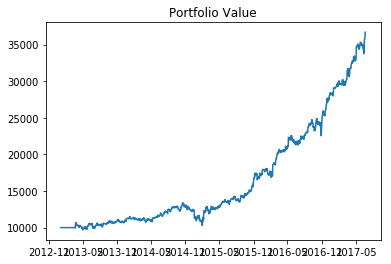

In [6]:
plt.plot(results.portfolio_value)
plt.title('Portfolio Value')
plt.show()

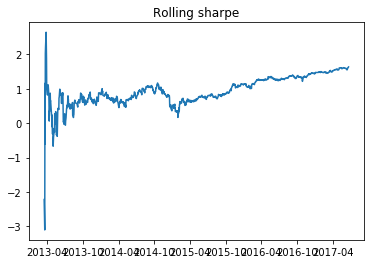

In [7]:
plt.plot(results.sharpe)
plt.title('Rolling sharpe')
plt.show()